## Loading data files
The purpose of this script is to perform quick explorations on the format of the two files used in this exercise. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Customers file

In [2]:
customers = pd.read_csv('data/customers.csv',
                         parse_dates=['signup_date'])

In [3]:
customers.head(2)

,id,signup_date,loyalty,location,gender,age,favorite_movie_line,number_of_purchases,value_of_purchases,total_standard_points,total_points_redeemed
0,1,2012-01-01,enrolled,LA,NaN,oldish,NaN,NaN,NaN,NaN,NaN
1,2,2012-01-01,enrolled,NaN,NaN,youthful,NaN,NaN,NaN,NaN,NaN


In [4]:
customers.shape

(20000, 11)

In [5]:
## find data coverage by column
customers.count().apply(lambda x: x/customers.shape[0])

id                       1.00000
signup_date              1.00000
loyalty                  1.00000
location                 0.49895
gender                   0.50130
age                      0.51010
favorite_movie_line      0.49815
number_of_purchases      0.00000
value_of_purchases       0.00000
total_standard_points    0.00000
total_points_redeemed    0.00000
dtype: float64

In [6]:
customers['age'].value_counts()

wise        2611
oldish      2564
youthful    2532
young       2495
Name: age, dtype: int64

In [7]:
customers['loyalty'].value_counts()

control     10005
enrolled     9995
Name: loyalty, dtype: int64

In [8]:
customers['signup_date'].dt.year.unique()

array([2012, 2013])

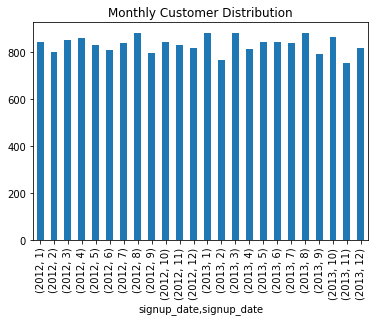

In [9]:
customers.groupby([customers['signup_date'].dt.year, customers['signup_date'].dt.month]).count()['id'].plot.bar()
plt.title('Monthly Customer Distribution')

## Transactions file

In [10]:
transactions = pd.read_csv('data/transactions.csv',
                            parse_dates=['date'])

In [11]:
transactions.head(2)

,date,user_id,value,point_differential
0,2012-01-01,17,1074,0
1,2012-01-02,17,381,0


In [12]:
transactions.shape

(157776, 4)

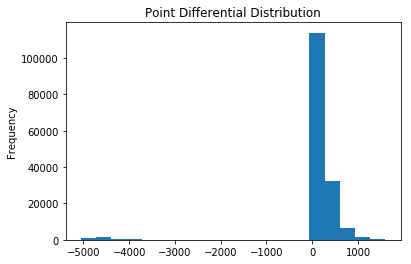

In [13]:
transactions['point_differential'].plot.hist(bins=20)
plt.title('Point Differential Distribution')

## Points per dollar calculations

In [14]:
transactions[transactions['point_differential']>0].head()

,date,user_id,value,point_differential
3,2012-01-03,6,1572,150
4,2012-01-03,41,1167,110
5,2012-01-03,48,2457,240
7,2012-01-03,70,1425,140
9,2012-01-04,78,1403,140


In [15]:
(
    transactions[transactions['point_differential']>0]
    .apply(lambda x: x['value']//x['point_differential'], axis=1)
    .value_counts()
)

10    84546
11     3336
12      633
13      316
14      202
18       68
19       65
17       60
16       58
15       54
dtype: int64